In [46]:
import os
os.getcwd()

'C:\\Users\\choub'

In [47]:
os.chdir("E:/Python_learn/11 dec_LR _BOSTON HOUSING")

In [48]:
os.getcwd()

'E:\\Python_learn\\11 dec_LR _BOSTON HOUSING'

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()
import warnings
warnings.filterwarnings('ignore')



In [50]:
"""
As problem is finding the price of house and it has multi variable.
formula:  y= B1*X1 + B2*X2 + B3*X3.....BN*XN + B0
In this case the variables are: crim	zn	indus	chas	nox	rm	age	dis	rad	tax	ptratio	b	lstat	medv
medv (PRICE) = B1*crim	+ B2*zn	+ B3*indus + B4*chas + B5*nox +	B6*rm+ B7*age + B8*dis+ B9*rad + B10*tax + B11*ptratio + B12*b + B13*lstat + B0
"""

'\nAs problem is finding the price of house and it has multi variable.\nformula:  y= B1*X1 + B2*X2 + B3*X3.....BN*XN + B0\nIn this case the variables are: crim\tzn\tindus\tchas\tnox\trm\tage\tdis\trad\ttax\tptratio\tb\tlstat\tmedv\nmedv (PRICE) = B1*crim\t+ B2*zn\t+ B3*indus + B4*chas + B5*nox +\tB6*rm+ B7*age + B8*dis+ B9*rad + B10*tax + B11*ptratio + B12*b + B13*lstat + B0\n'

In [51]:
df= pd.read_csv("BostonHousing.csv")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [53]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [54]:
df.duplicated().sum()

0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [56]:
# Here no need to do encoding as all are numerical variable since in LR we need num only

In [57]:
df.describe().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [58]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [59]:
df.skew()    # to check data is noramlly distributed or not if skewness= o then its noramlly distributed here it is + skewness

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

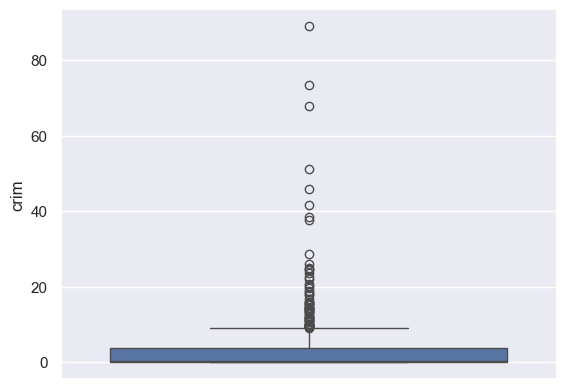

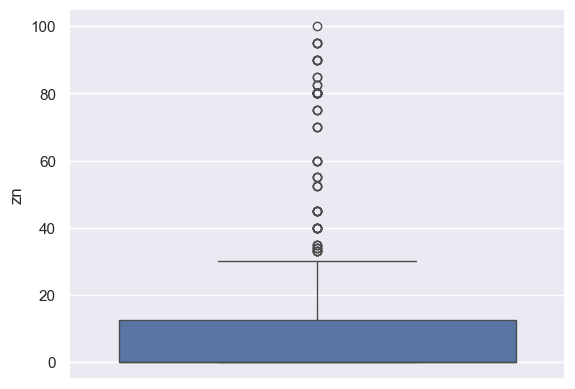

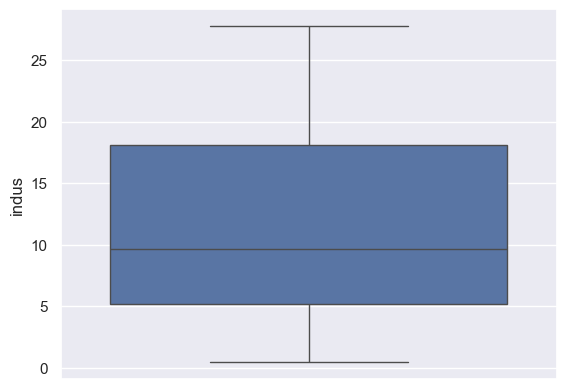

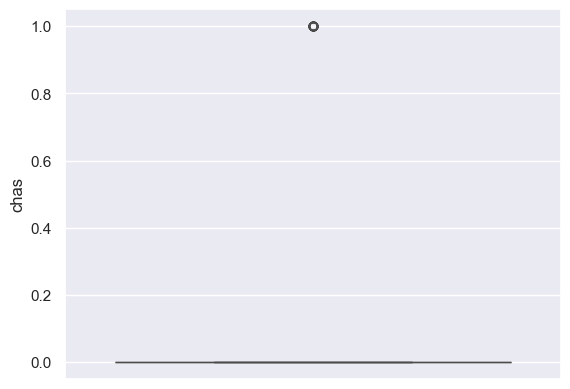

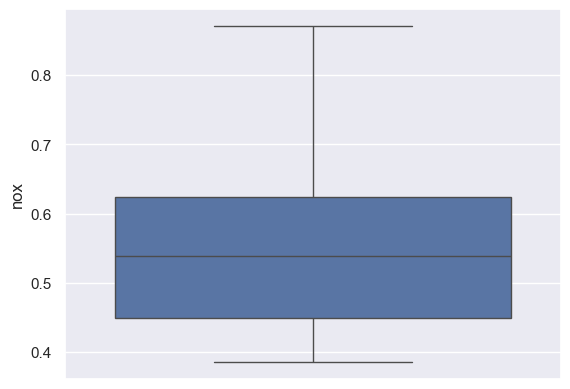

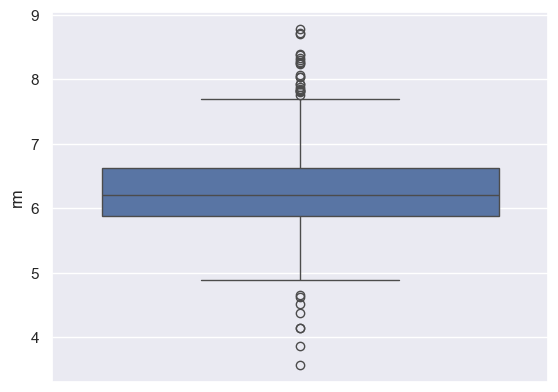

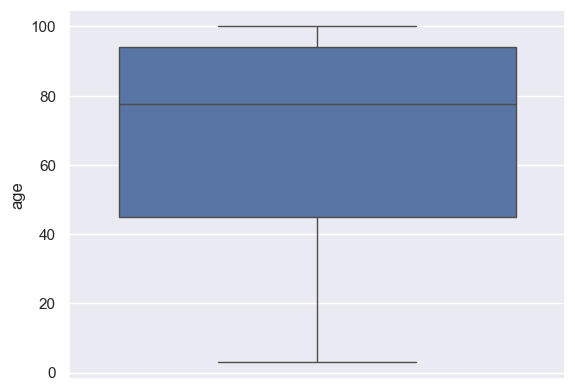

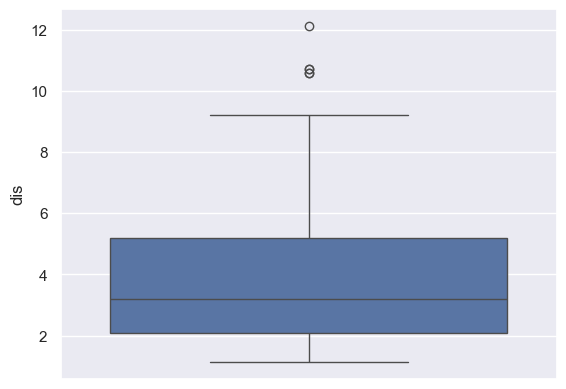

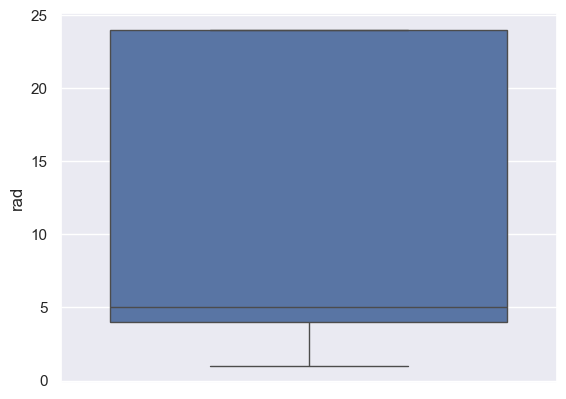

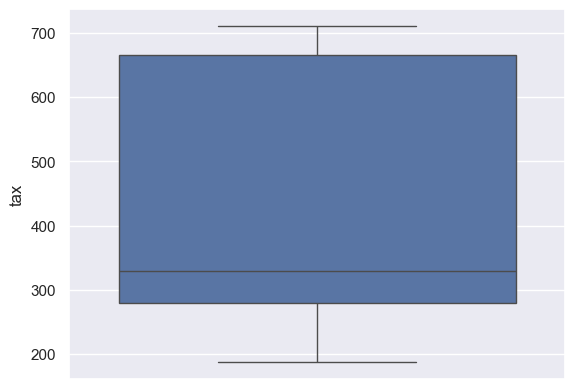

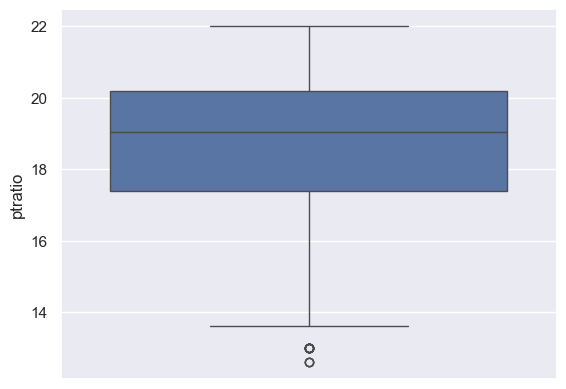

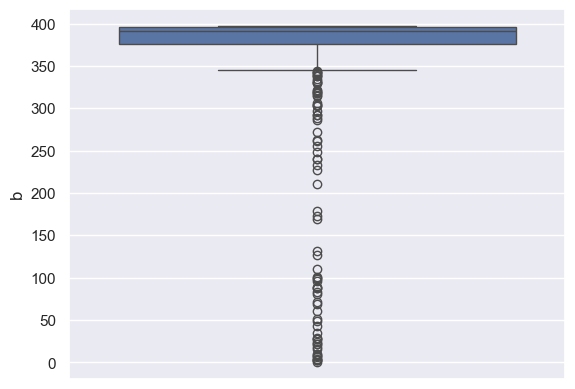

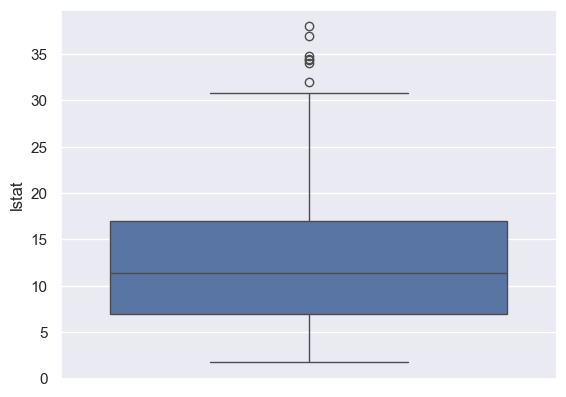

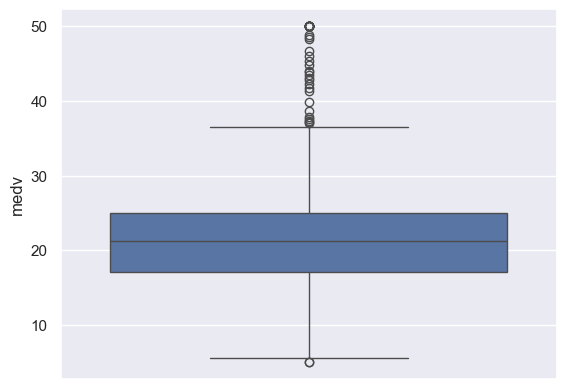

In [60]:
# checking outlier by boxplot
# No need to to modify the DV( MEDV even if there are outlier)

def boxplots(column):
    sns.boxplot(df[column])
    plt.show()

for i in list(df.select_dtypes(exclude= ['object']).columns)[0:]:   # Though there is no object check in info()
    boxplots(i)




In [61]:


# crime, zn, rm,b, need to perform outlier on these variables




In [62]:
# checking Correlation before outlier- It shows the relationship of IV with DP how much it's impacting or how much that variable is important range (-1to1)

In [63]:
df.corr().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


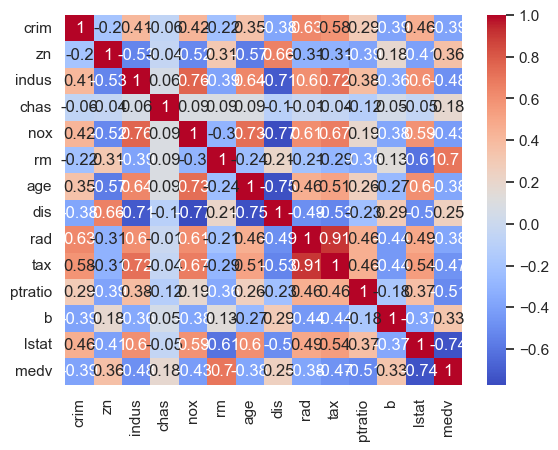

In [64]:
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')
plt.show()

In [65]:
# No need to modify the data we can see rm - 0.70 and lstat = -0.74	 it means it's grater than 70% so it is multicolliar which is not accepted in LR model
# Best method  to find colliniarity is VIF

corr_matrix = df.corr().round(2)
corr_matrix[np.abs(corr_matrix)>0.7]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zn,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indus,NaN,NaN,1.00,NaN,0.76,NaN,NaN,-0.71,NaN,0.72,NaN,NaN,NaN,NaN
chas,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,0.76,NaN,1.00,NaN,0.73,-0.77,NaN,NaN,NaN,NaN,NaN,NaN
rm,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,0.73,NaN,1.00,-0.75,NaN,NaN,NaN,NaN,NaN,NaN
dis,NaN,NaN,-0.71,NaN,-0.77,NaN,-0.75,1.00,NaN,NaN,NaN,NaN,NaN,NaN
rad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.91,NaN,NaN,NaN,NaN
tax,NaN,NaN,0.72,NaN,NaN,NaN,NaN,NaN,0.91,1.00,NaN,NaN,NaN,NaN


## Preprocessing Part

In [67]:
"""
1. Cleaning (duplicates)  and Handling missing values
2. Encoding concept
3. Outlier treatment
4. Feature Scaling
"""

'\n1. Cleaning (duplicates)  and Handling missing values\n2. Encoding concept\n3. Outlier treatment\n4. Feature Scaling\n'

In [68]:
df.duplicated().sum()

0

In [69]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [71]:
# Encoding is not required in this dataset

In [72]:
# crim, zn, rm,b, need to perform outlier on these variables
# using IQR method for outlier

df['crim'].describe().round(2)


count    506.00
mean       3.61
std        8.60
min        0.01
25%        0.08
50%        0.26
75%        3.68
max       88.98
Name: crim, dtype: float64

In [73]:
Q1= 0.08
Q3= 3.68
IQR= Q3-Q1
upper_limit= Q3 + 1.5*IQR
df['crim']=np.where(df['crim']> upper_limit, upper_limit,df['crim'])

In [74]:
df['zn'].describe().round(2)

count    506.00
mean      11.36
std       23.32
min        0.00
25%        0.00
50%        0.00
75%       12.50
max      100.00
Name: zn, dtype: float64

In [75]:
q1= 0
q3= 12.50
iqr=q3-q1
upper_limit=q3 + 1.5 *iqr
df['zn']=np.where(df['zn']>upper_limit, upper_limit,df['zn'] )

In [76]:
df['rm'].describe().round(2)

count    506.00
mean       6.28
std        0.70
min        3.56
25%        5.89
50%        6.21
75%        6.62
max        8.78
Name: rm, dtype: float64

In [77]:
q1= 5.89
q3= 6.62
iqr= q3-q1
upper_limit= q3 + 1.5*iqr
df['rm']=np.where(df['rm']> upper_limit, upper_limit, df['rm'])

In [78]:
df['b'].describe().round(2)

count    506.00
mean     356.67
std       91.29
min        0.32
25%      375.38
50%      391.44
75%      396.22
max      396.90
Name: b, dtype: float64

In [79]:
q1= 375.38
q3= 396.22
iqr= q3-q1
lower_limit= q3 - 1.5*iqr
df['b']= np.where(df['b']<lower_limit, lower_limit,df['b'] )

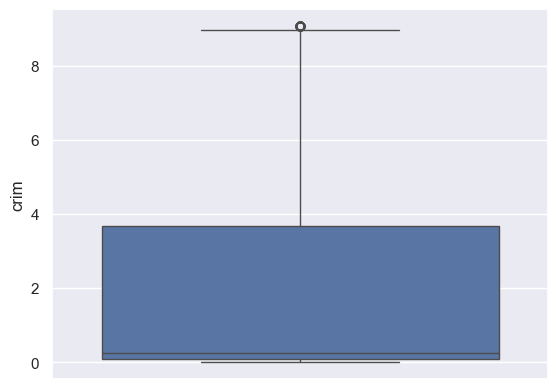

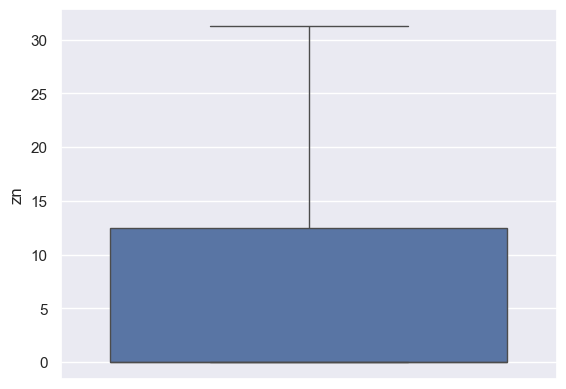

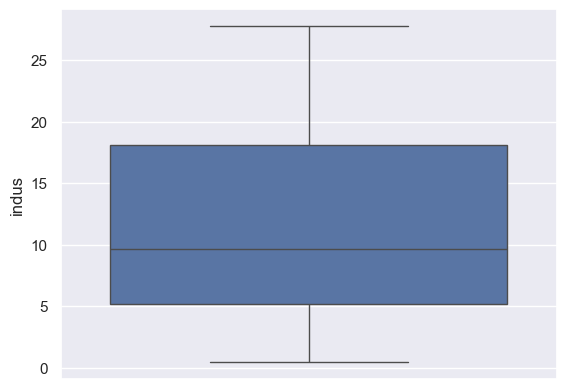

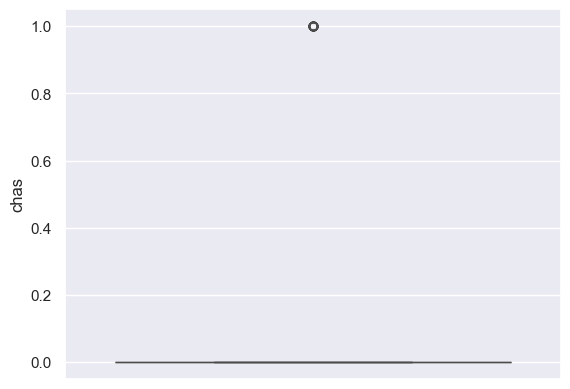

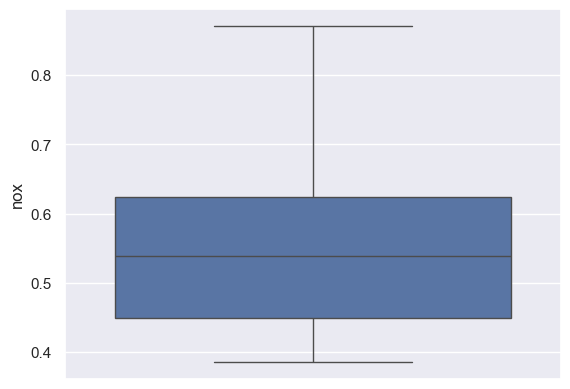

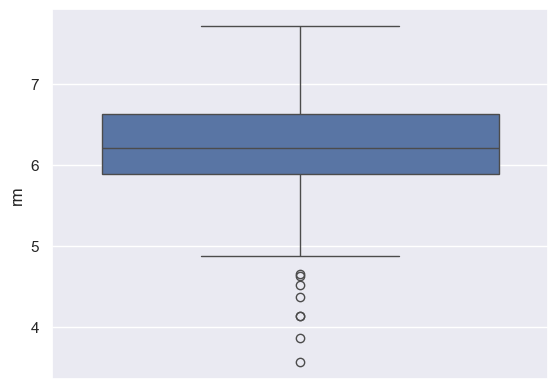

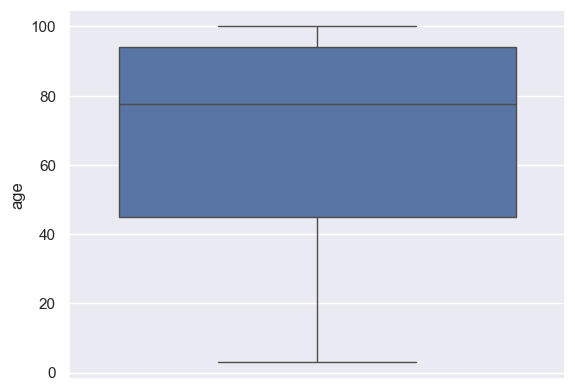

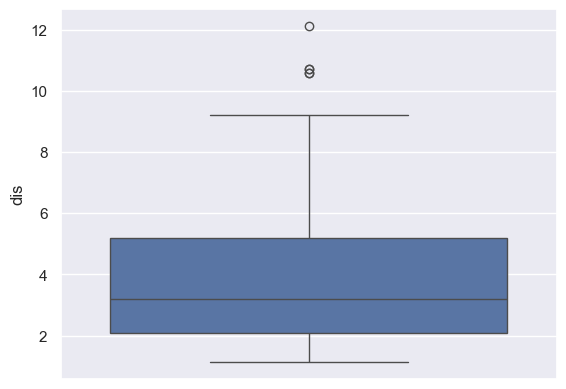

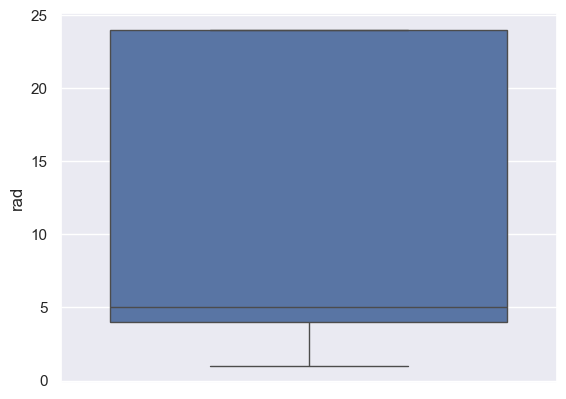

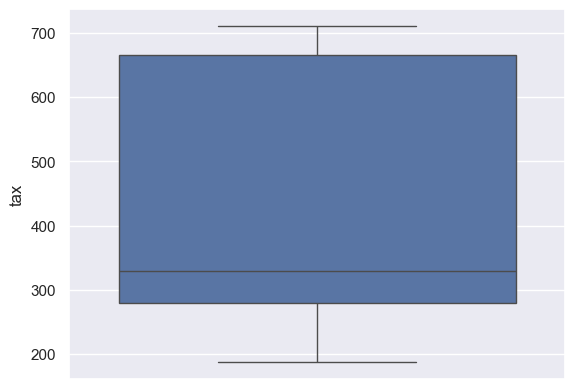

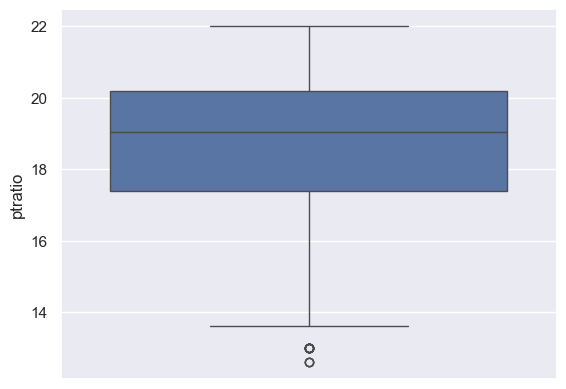

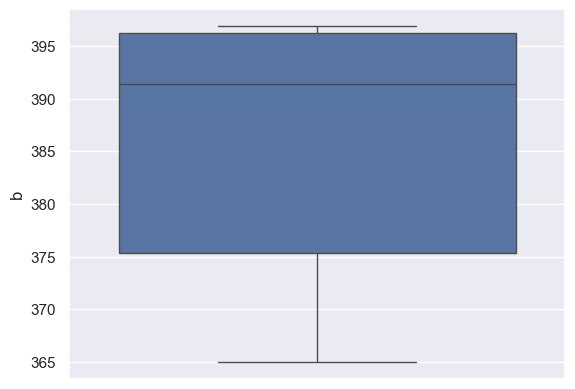

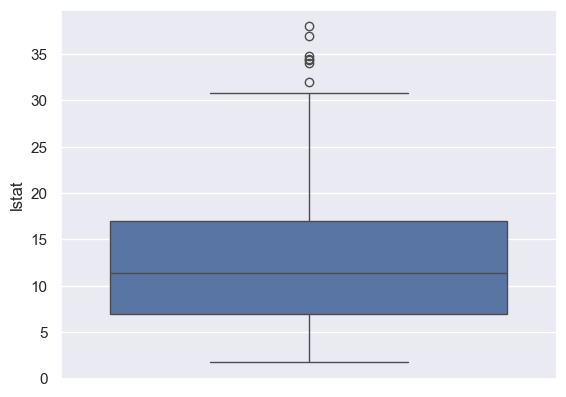

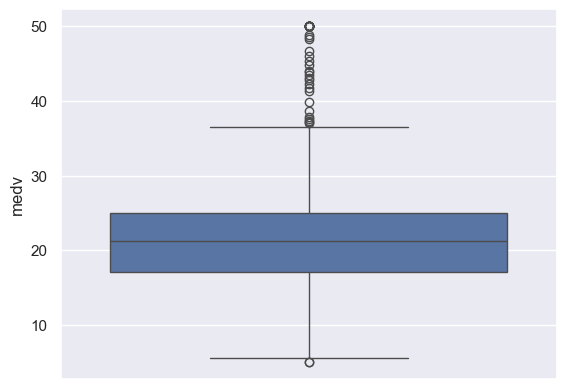

In [80]:
# outlier treatment done now checking again by boxplot

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [81]:
# splitting the IV AND DV 
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [82]:
x= df.drop(['medv'], axis= 1)
y= df['medv']


In [83]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [84]:
y.head()


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [85]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

# feature Scaling  

In [87]:
# 1. Normalisation Method ( Min-Max Scaler) -- It scales down the data between 0 and 1
# 2. Standarisation---Mostly use and we assume mean=0 and Sd is 1---It will make bell like curve

In [88]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaler= scaler.fit_transform(x)
x_scaler= pd.DataFrame(x_scaler, columns= x.columns)

In [89]:
x_scaler.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.670132,0.918420,-1.287909,-0.272599,-0.144217,0.472879,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.916997,-1.075562
1,-0.663797,-0.579471,-0.593381,-0.272599,-0.740262,0.237190,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.916997,-0.492439
2,-0.663803,-0.579471,-0.593381,-0.272599,-0.740262,1.406455,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.587271,-1.208727
3,-0.662269,-0.579471,-1.306878,-0.272599,-0.835284,1.120261,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.733096,-1.361517
4,-0.651197,-0.579471,-1.306878,-0.272599,-0.835284,1.348298,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.916997,-1.026501


In [90]:
x_scaler.describe().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.67,-0.58,-1.56,-0.27,-1.47,-4.14,-2.34,-1.27,-0.98,-1.31,-2.71,-1.67,-1.53
25%,-0.65,-0.58,-0.87,-0.27,-0.91,-0.58,-0.84,-0.81,-0.64,-0.77,-0.49,-0.83,-0.80
50%,-0.59,-0.58,-0.21,-0.27,-0.14,-0.09,0.32,-0.28,-0.52,-0.46,0.27,0.47,-0.18
75%,0.44,0.46,1.02,-0.27,0.60,0.55,0.91,0.66,1.66,1.53,0.81,0.86,0.60
max,2.07,2.02,2.42,3.67,2.73,2.22,1.12,3.96,1.66,1.80,1.64,0.92,3.55


# Variance Inflation Factor- To find multicollinearity ( If IV is having multicoliniarity then it would difficult to access the individual effect of IV on DP)
# It should be less than 5

In [92]:
x_scaler.shape

(506, 13)

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable= x_scaler
vif= pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns     


In [94]:
vif

,Variance Inflation Factor,Features
0,9.340205,crim
1,2.438353,zn
2,4.028846,indus
3,1.075308,chas
4,4.421450,nox
5,1.941425,rm
6,3.065636,age
7,3.974595,dis
8,12.590002,rad
9,8.667650,tax


In [95]:
# rad has highest VIF hence dropping it
x_scaler= x_scaler.drop(['rad'], axis= 1)
x_scaler.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [96]:
x_scaler.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [97]:
# checking VIF again after dropping
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaler
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x_scaler.columns  
vif  


,Variance Inflation Factor,Features
0,5.072341,crim
1,2.437757,zn
2,3.857003,indus
3,1.057993,chas
4,4.407783,nox
5,1.933694,rm
6,3.060650,age
7,3.974292,dis
8,5.727581,tax
9,1.816034,ptratio


## Now PREPROCESSING completed

# EDA

In [100]:

from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="EDA for Housing Price")
profile.to_file("eda_housing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [101]:
pip install jupyterlab_widgets
jupyter labextension install @jupyter-widgets/jupyterlab-manager


SyntaxError: invalid syntax (1208322101.py, line 1)

In [ ]:
os.getcwd()

# Splitting the data into Training and Testing 

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state= 100)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)



(404, 13) (102, 13) (404,) (102,)


In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
y_train

# Building the LR Model by Stats Method-OLS

In [111]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [ ]:
regression= smf.OLS(endog=y_train, exog= x_train).fit()
regression.summary()

In [ ]:
# Again doing regression model building part

In [ ]:
# Splitting IV AND DV

x= df.drop(['medv'], axis=1)
y = df['medv']

In [ ]:
x.head()


In [ ]:
y.head()

In [113]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.20, random_state=42)

In [ ]:
x_train.shape

In [ ]:
y_train

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [115]:
# Building multiple LR
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
LR.intercept_, LR.coef_

(33.58173666648444,
 array([-5.05267501e-01,  2.04812208e-02,  1.80125222e-02,  3.22209179e+00,
        -1.69176130e+01,  4.28547597e+00, -2.25653752e-03, -1.34177081e+00,
         3.17369772e-01, -9.44524010e-03, -1.00932024e+00,  9.30191552e-03,
        -5.45483021e-01]))

In [117]:
print("train accuracy", LR.score(x_train,y_train))
print("test accuracy", LR.score(x_test,y_test))

train accuracy 0.7213813886377829
test accuracy 0.665559003899024


In [147]:
# Output what we wanted to find.

y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)

In [149]:
y_pred_train

array([ 9.36938626, 19.38141319, 23.30022593, 14.83604034, 18.20961895,
       25.52148612, 21.1107618 , 22.99611316, 10.27595439, 19.93543055,
       22.25554981, 27.7396642 , 33.22929171, 16.72378236, 35.25254075,
       13.58889537, 20.88442955, 28.8054774 , 16.33762481, 24.91582393,
       13.80216861, 24.27110025, 25.88304372, 23.22329037, 23.50710739,
       34.35531981, 22.61602589, 39.21765664, 13.60577899, 25.56516996,
       17.70132732, 21.0964916 ,  8.87200741, 22.95561194, 22.49625384,
       30.66181417, 30.58070186, 15.46988178, 16.77231321, 28.08708221,
       23.32845618, 17.04878908,  8.34710315, 26.57455898, 23.49919434,
       15.14384794, 13.31810004, 36.99707238, 18.78644099, 16.00653236,
       25.95180557, 24.03075911, 22.27781991, 20.6094924 , 15.31928593,
       22.60025788, 29.65678242, 11.79600896, 24.74341737, 17.68082945,
       21.01684365, 25.42987305, 27.67437785, 21.01272784, 38.98657346,
       16.94262233, 15.3138917 , 19.84418397, 17.01921937, 22.98

In [154]:
y_pred_test

array([29.51952505, 36.25716545, 14.67411405, 25.25751882, 17.97417675,
       23.57148527, 17.64961211, 13.53231189, 22.79316294, 20.75014793,
       25.45181818, 19.29693495, -1.32754294, 22.06580463, 19.51770798,
       25.59692086, 19.97139002,  3.73658551, 38.86897075, 15.24647489,
       27.11659387, 29.7616977 , 10.88716553, 23.75822326, 16.98968712,
       14.17715892, 23.0998789 , 16.65573982, 22.88242696, 19.34606726,
       22.8671256 , 25.47571922, 24.61952808, 17.88349057, 16.6006168 ,
       17.90388081, 31.58836257, 20.40242176, 24.2489641 , 24.75040942,
       13.88488331, 32.3108411 , 39.72236907, 17.61666171, 27.50930837,
       15.50062044, 13.73960806, 26.04905463, 19.81118665, 30.48357793,
       22.0259634 , 34.93240845, 15.43688973, 26.30857328, 39.98134568,
       22.5472481 , 17.8306236 , 31.26627632, 25.29087005, 13.31442447,
       23.10095675, 29.21100743, 32.00922988, 16.6182301 , 20.37246448,
       16.95480451, 18.21801345, 26.10839097, 29.41167458, 15.39

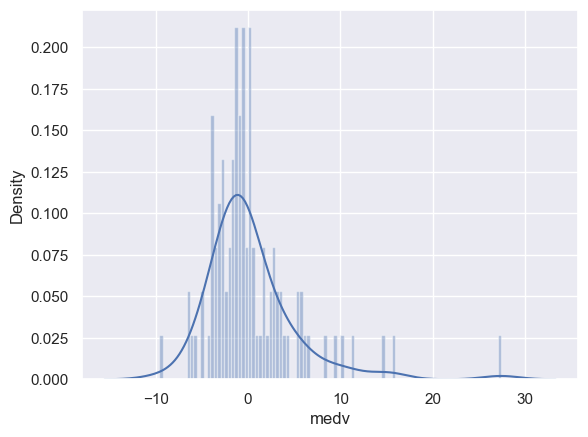

In [157]:
sns.distplot((y_test-y_pred_test), bins=100)
plt.show()

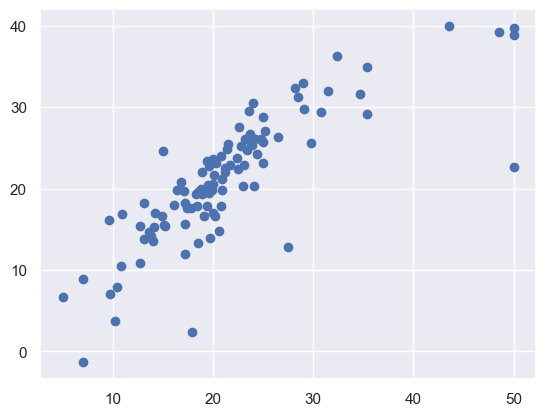

In [165]:
plt.scatter(y_test,y_pred_test)
plt.show()

# OLS METHOD

In [129]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [132]:
linear_reg_training = smf.OLS(endog=y_train, exog=x_train).fit()
linear_reg_test = smf.OLS(endog=y_test, exog=x_test).fit()

In [135]:
linear_reg_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              705.1
Date:                Wed, 01 Jan 2025   Prob (F-statistic):                   5.01e-262
Time:                        11:12:35   Log-Likelihood:                         -1222.0
No. Observations:                 404   AIC:                                      2470.
Df Residuals:                     391   BIC:                                      2522.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.4878      0.234     -2.082      0.038      -0.949      -0.027
zn             0.0221      0.033      0.670      0.503      -0.043       0.087
indus          0.0409      0.072      0.566      0.572      -0.101       0.183
chas           3.1887      1.021      3.123      0.002       1.181       5.196
nox          -11.9672      4.247     -2.817      0.005     -20.318      -3.616
rm             4.9946      0.492     10.160      0.000       4.028       5.961
age           -0.0032      0.016     -0.208      0.835      -0.034       0.027
dis           -1.1502      0.233     -4.945      0.000      -1.608      -0.693
rad            0.2787      0.104      2.687      0.008       0.075       0.483
tax           -0.0081      0.004     -1.847      0.065      -0.017       0.001
ptratio       -0.9025      0.155     -5.821      0.000      -1.207      -0.598
b              0.0686      0.013      5.302      0.000       0.043       0.094
lstat         -0.5148      0.061     -8.489      0.000      -0.634      -0.396
==============================================================================
Omnibus:                      145.588   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.802
Skew:                           1.538   Prob(JB):                    1.16e-134
Kurtosis:                       8.213   Cond. No.                     9.72e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
linear_reg_test.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              144.6
Date:                Wed, 01 Jan 2025   Prob (F-statistic):                    6.59e-54
Time:                        11:16:09   Log-Likelihood:                         -307.20
No. Observations:                 102   AIC:                                      640.4
Df Residuals:                      89   BIC:                                      674.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.2870      0.497     -0.578      0.565      -1.274       0.700
zn             0.1523      0.068      2.226      0.029       0.016       0.288
indus         -0.0608      0.178     -0.341      0.734      -0.415       0.293
chas           2.6562      2.407      1.103      0.273      -2.127       7.439
nox           -7.4260     10.028     -0.741      0.461     -27.351      12.499
rm             3.1972      1.067      2.995      0.004       1.076       5.318
age            0.0020      0.038      0.054      0.957      -0.073       0.077
dis           -0.8598      0.483     -1.779      0.079      -1.820       0.100
rad            0.3239      0.212      1.531      0.129      -0.096       0.744
tax           -0.0079      0.010     -0.777      0.439      -0.028       0.012
ptratio       -0.6488      0.368     -1.763      0.081      -1.380       0.083
b              0.0731      0.028      2.646      0.010       0.018       0.128
lstat         -0.4956      0.143     -3.474      0.001      -0.779      -0.212
==============================================================================
Omnibus:                       69.498   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.093
Skew:                           2.160   Prob(JB):                     6.08e-97
Kurtosis:                      12.252   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""